SMOTE:
Diabetes_binary
0                  174595
1                  174595
Name: count, dtype: int64
-- Epoch 1
Norm: 1.17, NNZs: 21, Bias: -0.723958, T: 349190, Avg. loss: 0.511486
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 1.22, NNZs: 21, Bias: -0.678911, T: 698380, Avg. loss: 0.510389
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 1.16, NNZs: 21, Bias: -0.723367, T: 1047570, Avg. loss: 0.510385
Total training time: 0.20 seconds.
-- Epoch 4
Norm: 1.15, NNZs: 21, Bias: -0.726247, T: 1396760, Avg. loss: 0.510441
Total training time: 0.26 seconds.
-- Epoch 5
Norm: 1.21, NNZs: 21, Bias: -0.686611, T: 1745950, Avg. loss: 0.510374
Total training time: 0.32 seconds.
-- Epoch 6
Norm: 1.19, NNZs: 21, Bias: -0.720040, T: 2095140, Avg. loss: 0.510287
Total training time: 0.39 seconds.
-- Epoch 7
Norm: 1.19, NNZs: 21, Bias: -0.714644, T: 2444330, Avg. loss: 0.510315
Total training time: 0.46 seconds.
Convergence after 7 epochs took 0.46 seconds



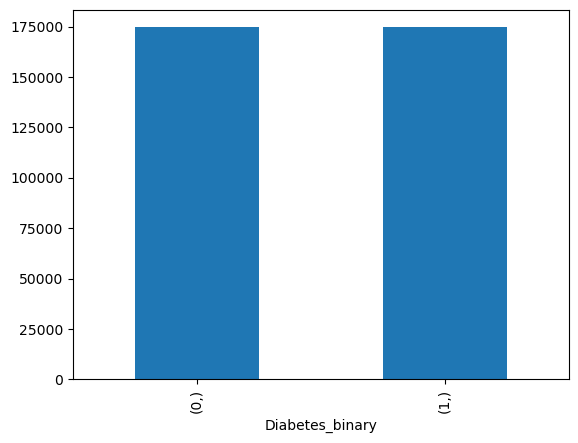

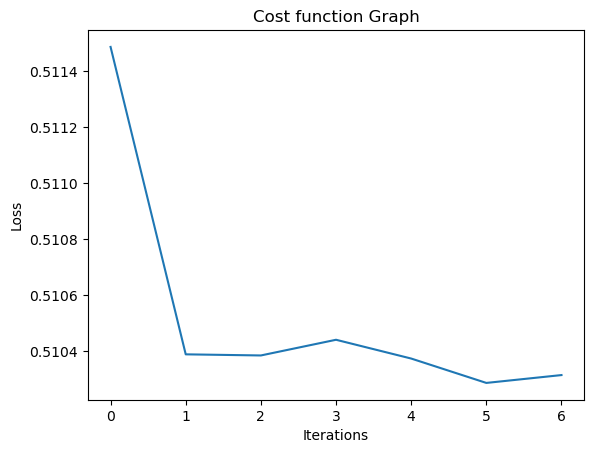

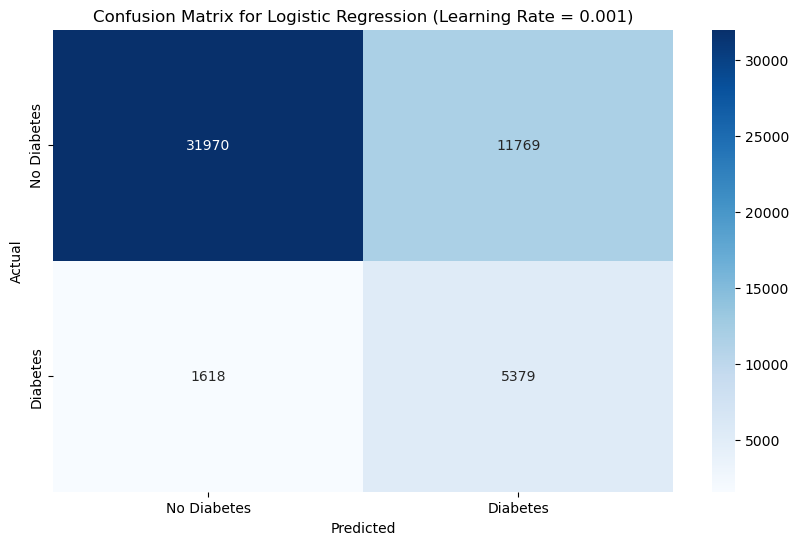

Classification Report for Logistic Regression (Learning Rate = 0.001):
              precision    recall  f1-score   support

           0       0.95      0.73      0.83     43739
           1       0.31      0.77      0.45      6997

    accuracy                           0.74     50736
   macro avg       0.63      0.75      0.64     50736
weighted avg       0.86      0.74      0.77     50736

Specificity:         73.1 

Sensitivity:         76.9 (Recall)
-- Epoch 1
Norm: 1.21, NNZs: 21, Bias: -0.746151, T: 349190, Avg. loss: 0.519761
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 1.36, NNZs: 21, Bias: -0.659411, T: 698380, Avg. loss: 0.519805
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 1.17, NNZs: 21, Bias: -0.722505, T: 1047570, Avg. loss: 0.519761
Total training time: 0.19 seconds.
-- Epoch 4
Norm: 1.16, NNZs: 21, Bias: -0.733971, T: 1396760, Avg. loss: 0.519785
Total training time: 0.25 seconds.
-- Epoch 5
Norm: 1.31, NNZs: 21, Bias: -0.664659, T: 1745950, Avg. loss: 

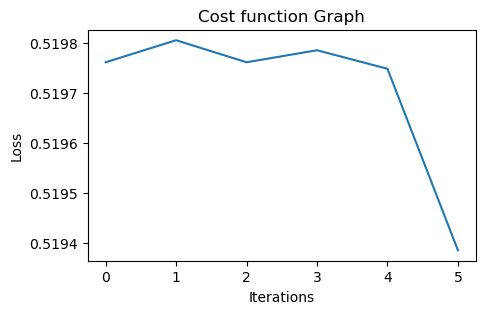

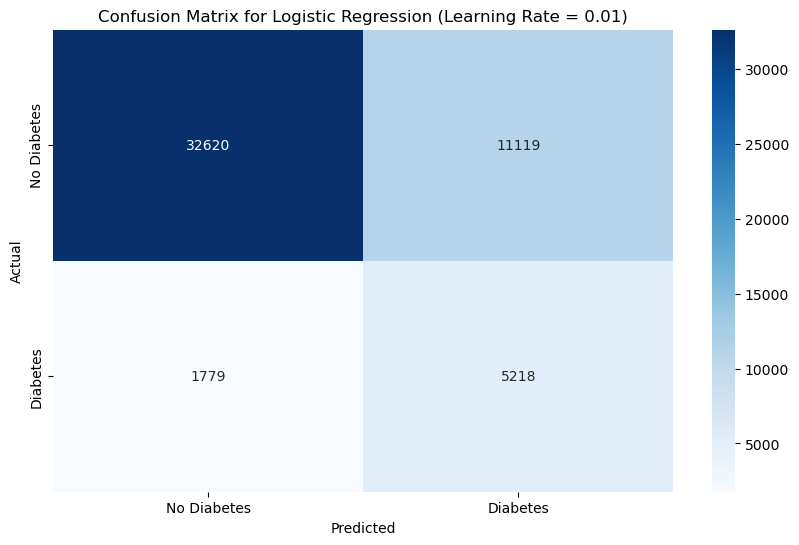

Classification Report for Logistic Regression (Learning Rate = 0.01):
              precision    recall  f1-score   support

           0       0.95      0.75      0.83     43739
           1       0.32      0.75      0.45      6997

    accuracy                           0.75     50736
   macro avg       0.63      0.75      0.64     50736
weighted avg       0.86      0.75      0.78     50736

Specificity:         74.6 

Sensitivity:         74.6 (Recall)
-- Epoch 1
Norm: 2.05, NNZs: 21, Bias: -0.755969, T: 349190, Avg. loss: 0.654660
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 2.14, NNZs: 21, Bias: -0.876217, T: 698380, Avg. loss: 0.655039
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 1.89, NNZs: 21, Bias: -1.099107, T: 1047570, Avg. loss: 0.655411
Total training time: 0.19 seconds.
-- Epoch 4
Norm: 2.12, NNZs: 21, Bias: -0.429759, T: 1396760, Avg. loss: 0.654886
Total training time: 0.26 seconds.
-- Epoch 5
Norm: 1.90, NNZs: 21, Bias: -0.603892, T: 1745950, Avg. loss: 0

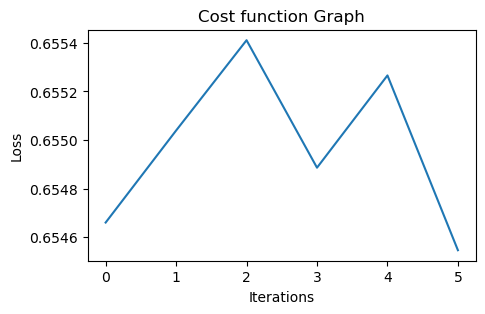

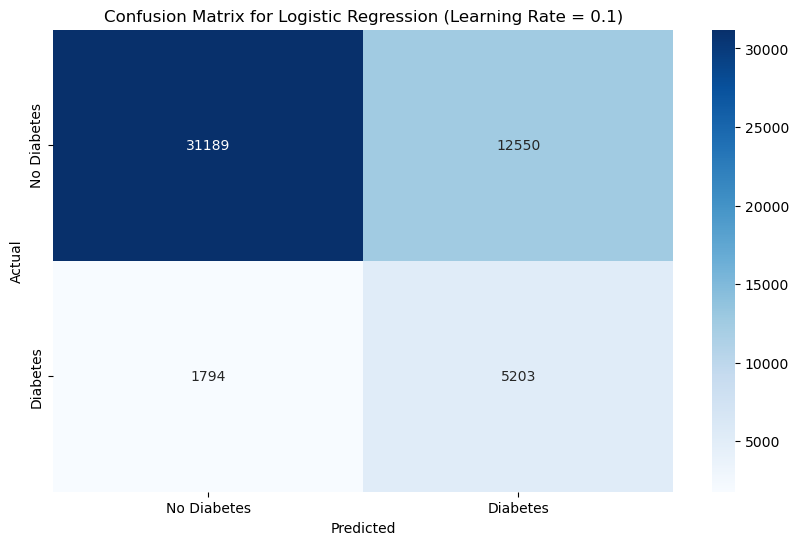

Classification Report for Logistic Regression (Learning Rate = 0.1):
              precision    recall  f1-score   support

           0       0.95      0.71      0.81     43739
           1       0.29      0.74      0.42      6997

    accuracy                           0.72     50736
   macro avg       0.62      0.73      0.62     50736
weighted avg       0.86      0.72      0.76     50736

Specificity:         71.3 

Sensitivity:         74.4 (Recall)


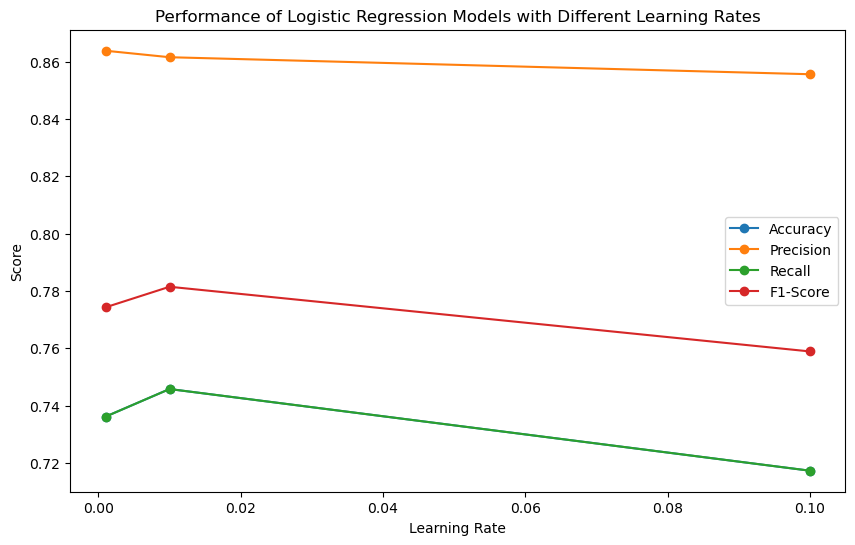

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import scipy 
from scipy import stats 
from ucimlrepo import fetch_ucirepo 
import sys 
from io import StringIO
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

def standardize_data(data):
    data_standardized = data.copy()
    names = data.columns
    for name in names:
        data_standardized[name] = stats.zscore(data[name])
    return data_standardized
    
# Fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

X = standardize_data(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)
y_resampled_smote.value_counts().plot(kind = 'bar')
print("SMOTE:")
print(y_resampled_smote.value_counts())

learning_rates = [0.001, 0.01, 0.1]
log_reg_models = []
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

for lr in learning_rates:
    old_stdout = sys.stdout
    sys.stdout = mystdout = StringIO()
    logr = SGDClassifier(loss='log_loss',learning_rate='constant',eta0=lr,max_iter=1000,random_state=42,verbose=3)
    logr.fit(X_resampled_smote, np.ravel(y_resampled_smote,order='C'))#y_resampled_smote)
    sys.stdout = old_stdout
    loss_history = mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
        print(line)
        if(len(line.split("loss: ")) == 1):
            continue
        loss_list.append(float(line.split("loss: ")[-1]))
        
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title('Cost function Graph')
    plt.rcParams["figure.figsize"] = (5,3)

    y_pred = logr.predict(X_test)
    
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted'))

    # Plot confusion matrix for each learning rate
    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix for Logistic Regression (Learning Rate = {lr})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print classification report for each learning rate
    print(f'Classification Report for Logistic Regression (Learning Rate = {lr}):\n{classification_report(y_test, y_pred)}')
    TN, FP    = cm[0, 0], cm[0, 1]
    FN, TP    = cm[1, 0], cm[1, 1]
    
    print('Specificity:        ',  round(TN / float(TN + FP),3)*100, "\n")
    print('Sensitivity:        ',  round(TP / float(TP + FN),3)*100, "(Recall)")
# Plot the metrics of Logistic Regression models in a single graph
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, metrics['accuracy'], marker='o', label='Accuracy')
plt.plot(learning_rates, metrics['precision'], marker='o', label='Precision')
plt.plot(learning_rates, metrics['recall'], marker='o', label='Recall')
plt.plot(learning_rates, metrics['f1'], marker='o', label='F1-Score')
plt.title("Performance of Logistic Regression Models with Different Learning Rates")
plt.xlabel("Learning Rate")
plt.ylabel("Score")
plt.legend()
plt.show()